<a href="https://colab.research.google.com/github/Rocyan4/Data_science/blob/master/Wordcloud_personalizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Wordcloud (Núvem de palavras)

**1. Qual o Objetivo desse artigo?** \

O principal objetivo desse artigo é monstar as vantagens da utilização de wordclouds em apresentações e em relatórios. \

**2. Mostrar aplicação dataset com dados reais.** \

Utilizaremos os dados do comércio brasileiro disponibilizados no [Portal Brasileiros de dados](https://dados.gov.br/) e também disponibilizado [aqui](https://www.kaggle.com/olistbr/brazilian-ecommerce) 

**3. Clonclusão.**

In [1]:
#Dataset para gerar wordclouds personalizadas 

import requests
from bs4 import BeautifulSoup
from collections import Counter
from string import punctuation
!pip install wordcloud 
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import matplotlib.pyplot as plt
% matplotlib inline



**Importando um arquivo direto da pasta do google drive**


In [2]:
#validando dataset inserido no google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Leitura do arquivo csv na nuvem do google drive
data = pd.read_csv("/content/drive/My Drive/olist_order_reviews_dataset.csv")

In [ ]:
# Comando head para olhar as primeiras 5 linhas do dataset
data.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [4]:
#selecionando apenas a coluna que eu quero utilizar
colunas_selecionadas =  ['review_comment_message']

In [5]:
# Versão final do dataset a ser utlizada e fazendo filtagem das colunas que será utilizada 
dataset_final = data.filter(items=colunas_selecionadas)

In [6]:
dataset_final.head(100000)

,review_comment_message
0,NaN
1,NaN
2,NaN
3,Recebi bem antes do prazo estipulado.
4,Parabéns lojas lannister adorei comprar pela I...
...,...
99995,NaN
99996,"Excelente mochila, entrega super rápida. Super..."
99997,NaN
99998,Solicitei a compra de uma capa de retrovisor c...


**É sempre importante tratar os dados ausentes no caso utilizar o comando dropna é essncial nesse caso**

In [8]:
palavras = dataset_final.dropna(subset=['review_comment_message'], axis=0)['review_comment_message']
palavras

3                    Recebi bem antes do prazo estipulado.
4        Parabéns lojas lannister adorei comprar pela I...
9        aparelho eficiente. no site a marca do aparelh...
12         Mas um pouco ,travando...pelo valor ta Boa.\r\n
15       Vendedor confiável, produto ok e entrega antes...
                               ...                        
99983    Entregou dentro do prazo. O produto chegou em ...
99990    O produto não foi enviado com NF, não existe v...
99996    Excelente mochila, entrega super rápida. Super...
99998    Solicitei a compra de uma capa de retrovisor c...
99999    meu produto chegou e ja tenho que devolver, po...
Name: review_comment_message, Length: 41753, dtype: object

In [9]:
# Realizando contagem total de palavras no dataset 
palavras_totais = " ".join(s for s in palavras)
print("Quantidade de Palavras: {}".format(len(palavras_totais)))

Quantidade de Palavras: 2966075


**É importante eliminarmos as palavras que não serão úteis para analisarmos**

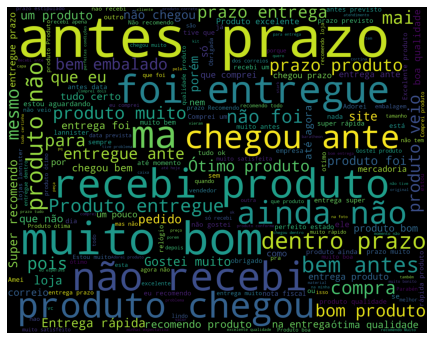

In [11]:
#excluindo palavras que não quero usar
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1800, height=1400).generate(palavras_totais)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("palavras_ecommerce.png")


##Agora vamos a conclusão 

Foram analisadas aproximadamente 3 milhões de palavras a principal vantagem que podemos notar é que é muito rápido para extrairmos informações dessas gigantes quantidades de palavras.

A principal vantagem de utilizar python ao me ver é poder fazer análises de forma fácil e rápida, talvez ferramentas como excel não conseguiríamos ter essa proatividade e eficácia para analisarmos esse cenário
Logo de cara ao analisarmos as palavras podemos notar que as maiores palavras são positivas o que remete um cenário positivo das avaliações dos produtos no e-commerce Brasileiro.

 


## Como personalizar uma wordcloud com uma imagem específica

**Agora vamos fazer a mesma coisa usando uma imagem específica, pode ser utilizado logos de empresa entre outros, o importante é a imagem estar com uma "black-mask"**

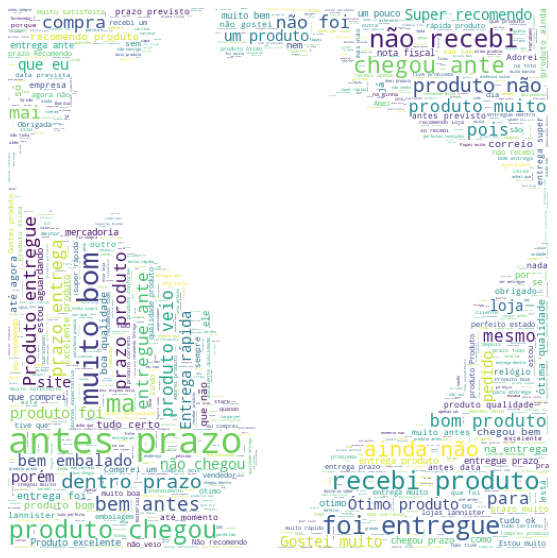

In [13]:

# A imagem encontra-se no me google drive, a variável mapa foi definida para bscar a imagem no drive
mapa = np.array(Image.open("/content/drive/My Drive/brazil-map.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=2000,
                      mask=mapa, max_font_size=200,
                      min_font_size=1).generate(palavras_totais)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)

wordcloud.to_file("mapa.png")

**Abaixo vou fazer um exemplo com a imagem do Twitter pois é uma rede social muito utilizada pelas empresas para conhecer mais o cenário e os reviews dos clientes**

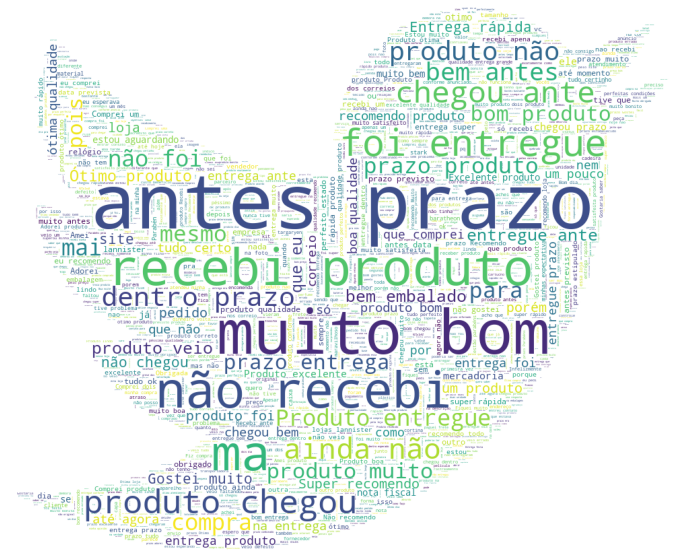

In [ ]:

# endereço da imagem
nuvem_p = np.array(Image.open("/content/drive/My Drive/twitter.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color=('white'),
                      width=1800, height=1400, max_words=2000,
                      mask=nuvem_p, max_font_size=200,
                      min_font_size=1).generate(palavras_totais)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("nuvem_tt.png")